<a href="https://colab.research.google.com/github/sagargahalod/Misc/blob/master/Fieldwork_RootCause_Team_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Mounting your Google Drive ...")
 
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive',force_remount=True)
 
path = "/content/drive/My Drive/Rootcause/"

Mounting your Google Drive ...
Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Creating a dataframe from the given file
df = pd.read_csv(path+"RC_PRODUCTION_clean.csv",engine='python',sep='\s+|,|\t')
df.head()

,COIL,DATE,MT,TIME_START_PROCESS,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,TEMP_Z6,PYRO_1_PRECHMBR,PYRO_2_FRST_3_ZONE,PYRO_3_LST_3_ZONE,LS_OVEN,LASER_FRN_1,LASER_FRN_2,LASER_FRN_3,LASER_FRN_4,LASER_FRN_5,LASER_FRN_6,LASER_FRN_7,LASER_FRN_8,LASER_FRN_9,AIR_CH4_1,AIR_CH4_2,AIR_CH4_3,AIR_CH4_4,AIR_CH4_5,AIR_CH4_6,AIR_Z1_1,AIR_Z1_2,AIR_Z2_1,AIR_Z2_2,AIR_Z3_1,AIR_Z3_2,AIR_Z4_1,AIR_Z4_2,AIR_Z5_1,AIR_Z5_2,...,COOL_1A,COOL_1B,COOL_2A,COOL_2B,COOL_3,LS_COOLING,LASER_RAFF_1,LASER_RAFF_2,LASER_RAFF_3,LASER_RAFF_4,LASER_RAFF_5,LASER_RAFF_6,LASER_RAFF_7,LASER_RAFF_8,LASER_RAFF_9,TOUT_RAFF_H2O,N_RAMPE_H2O,ELET_TEMP,ELET_H2SO4,ELET_FE2,ELET_CORRENTE,DEC_TEMP,DEC_H2SO4,DEC_HF,DEC_FE2,DEC_FE3,DEC_FETOT,SPZ2_R1,SPZ2_R2,SPZ2_R3,SPZ2_R4,SPZ1_R1_ASS,SPZ1_R2_ASS,TIRO_DECAP,SPEED_FILL,FILL_FORZA,FILL_TIRO,FILL_ALL,FILL_BENDING_POS,FILL_BENDING_NEG
0,"""240627",2019-03-15,0.0,"""""14:25:23.060""""",16.934625,671.967562,679.751438,688.119187,716.717250,734.616563,734.603062,549.3825,667.890562,548.112375,680.363437,675.189562,677.733187,678.710812,680.512500,681.296625,681.257250,680.042250,677.425500,675.167063,5.412954,-2.463474,-197.742938,0.271786,-0.082831,3.195928,35.145338,295.377750,-59.750888,-33.014306,42.801750,172.177312,33.087825,30.396881,-3.469629,0.231439,...,466.040250,296.154000,183.563438,110.944688,74.410819,94.668638,27.482963,28.003106,30.131606,94.425413,94.524019,95.056537,79.568213,79.544250,31.477163,46.166963,12.49875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""""""""","""""""""","""""""""","""""""""","""""""""",""""""""""""
1,"""240627",2019-03-15,7.0,"""""14:25:53.060""""",16.773638,668.635875,676.207125,681.034500,710.093250,729.040500,727.025625,549.3825,668.464875,548.112375,685.389375,675.187875,680.254875,681.987375,685.770750,687.187125,687.065625,684.934875,679.737375,675.140625,5.702468,-2.587680,-179.533125,0.279100,-0.050294,3.584981,36.641813,295.934625,-59.764950,-35.279438,42.413287,171.421875,33.298875,31.581900,-2.599538,0.641584,...,470.616750,299.374875,186.270750,102.729712,57.856837,66.875287,26.618963,27.168750,29.046038,66.229537,66.171037,68.225288,27.687038,25.408462,28.310962,46.166963,12.49875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""""""""","""""""""","""""""""","""""""""","""""""""",""""""""""""
2,"""240627",2019-03-15,14.0,"""""14:26:23.060""""",11.142165,669.105375,677.042625,678.493125,707.967750,727.783500,724.035750,549.3825,667.828500,548.112375,686.797875,675.192375,681.437625,683.927250,687.002625,688.842750,688.174500,686.041500,681.386625,675.134625,5.890249,-2.584238,75.733500,0.273436,-0.001853,3.798979,37.464562,296.771625,-59.747062,-38.886825,42.035400,171.511125,32.032162,31.558612,-1.750928,1.677368,...,488.363063,308.761594,190.889156,108.016931,57.902175,66.992681,26.639663,27.178538,28.887019,66.007716,66.535706,68.434706,27.399403,25.374009,28.386169,46.166963,12.49875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""""""""","""""""""","""""""""","""""""""","""""""""",""""""""""""
3,"""240627",2019-03-15,21.0,"""""14:27:08.060""""",11.148851,671.631750,681.066000,679.704750,707.241375,727.886250,723.072375,549.3825,675.487125,548.112375,691.403625,675.190125,686.926125,687.954375,691.520625,693.407250,693.122625,691.015500,684.631125,675.146250,6.111292,-2.525355,-182.912625,0.274255,0.053338,4.074187,37.178438,296.795250,-59.743913,-36.931162,42.994125,172.504125,31.983188,31.460625,-0.875953,2.966715,...,505.068750,332.637187,204.207750,116.533688,63.082406,69.321150,26.566875,27.083250,28.850625,68.490787,68.298019,71.174644,27.305606,25.236394,28.113356,46.166963,12.49875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""""""""","""""""""","""""""""","""""""""","""""""""",""""""""""""
4,"""240627",2019-03-15,28.0,"""""14:27:38.060""""",15.657188,675.052875,686.972813,683.336250,710.432437,730.182375,724.168688,549.3825,696.461625,567.477562,696.418875,675.201375

Brief description about the data:
1. There are 110 features 
2. Could not find the labels(dependent var) in the file (from the high level observation done so far). In this  case ,we will have to do the clustering(unsupervised)
3. The data is for the period of 2~2.5 months

In [ ]:
#It can be noticed that many variables have a Special character associated with the actual value and needs to be removed
# To reduce the processing time need to identify the unessessary columns and drop them (including NAN ),basically we have to do the feature extraction/selection before data cleaning

df.tail(100)

,COIL,DATE,MT,TIME_START_PROCESS,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,TEMP_Z6,PYRO_1_PRECHMBR,PYRO_2_FRST_3_ZONE,PYRO_3_LST_3_ZONE,LS_OVEN,LASER_FRN_1,LASER_FRN_2,LASER_FRN_3,LASER_FRN_4,LASER_FRN_5,LASER_FRN_6,LASER_FRN_7,LASER_FRN_8,LASER_FRN_9,AIR_CH4_1,AIR_CH4_2,AIR_CH4_3,AIR_CH4_4,AIR_CH4_5,AIR_CH4_6,AIR_Z1_1,AIR_Z1_2,AIR_Z2_1,AIR_Z2_2,AIR_Z3_1,AIR_Z3_2,AIR_Z4_1,AIR_Z4_2,AIR_Z5_1,AIR_Z5_2,...,COOL_1A,COOL_1B,COOL_2A,COOL_2B,COOL_3,LS_COOLING,LASER_RAFF_1,LASER_RAFF_2,LASER_RAFF_3,LASER_RAFF_4,LASER_RAFF_5,LASER_RAFF_6,LASER_RAFF_7,LASER_RAFF_8,LASER_RAFF_9,TOUT_RAFF_H2O,N_RAMPE_H2O,ELET_TEMP,ELET_H2SO4,ELET_FE2,ELET_CORRENTE,DEC_TEMP,DEC_H2SO4,DEC_HF,DEC_FE2,DEC_FE3,DEC_FETOT,SPZ2_R1,SPZ2_R2,SPZ2_R3,SPZ2_R4,SPZ1_R1_ASS,SPZ1_R2_ASS,TIRO_DECAP,SPEED_FILL,FILL_FORZA,FILL_TIRO,FILL_ALL,FILL_BENDING_POS,FILL_BENDING_NEG
299284,"""6838679",2019-04-19,182.0,"""""09:29:17.920""""",7.830090,1041.337125,1054.396125,1045.387125,1045.129500,1066.244625,1046.320875,664.876125,1072.860750,859.712625,1070.60625,695.536875,1061.093250,1065.974625,1070.742375,1074.274875,1073.458125,1068.582375,1061.317125,740.100375,1.066000,1.117293,-4.587682,1.171418,0.147545,1.712396,764.719875,787.878000,271.595250,453.202875,41.608463,103.559288,436.846500,442.932750,-3.317287,8.610120,...,487.082250,245.928375,117.358875,52.524900,31.139100,37.395450,23.097037,23.133038,23.106037,37.891463,37.070213,37.224788,36.920250,36.734288,22.856962,46.163363,12.49875,56.301638,107.10,0.0000,2705.990625,69.290719,112.1625,40.950,22.950,48.9375,71.8875,561.938063,530.059500,530.426812,530.138813,16.875000,16.875,3309.013125,"""""10.817831""""","""""195.969375""""","""""1414.395000""""","""""0.048715""""","""""0.258912""""","""""0.134985"""""""
299285,"""6838679",2019-04-19,189.0,"""""09:30:17.920""""",7.815521,1044.462375,1056.938625,1047.078000,1047.794625,1069.120125,1050.187500,658.289250,1074.218625,874.540125,1090.24650,700.711875,1081.077750,1086.049125,1090.797750,1093.557375,1092.749625,1088.082000,1079.664750,746.330625,1.083445,1.106022,-4.606897,1.167221,0.149585,2.884331,777.802500,805.015125,295.381125,463.574250,42.000413,104.970600,430.431750,438.291000,-3.513578,8.845459,...,487.678500,246.251250,117.313875,52.818975,30.796313,37.673212,22.996463,23.090963,23.009963,38.186213,37.298250,37.535287,37.085963,36.787500,22.845038,46.165837,12.49875,56.423306,107.10,0.0000,2714.130000,69.306356,112.1625,40.950,22.950,48.9375,71.8875,561.796313,530.116875,530.508938,530.181000,16.875000,16.875,3309.457500,"""""10.198541""""","""""199.990125""""","""""1408.567500""""","""""0.050818""""","""""0.258896""""","""""0.134991"""""""
299286,"""6838679",2019-04-19,196.0,"""""09:31:17.920""""",7.865539,1046.287125,1059.651000,1048.523625,1052.894250,1069.454250,1053.258750,658.248750,1076.070375,879.350625,1096.71975,701.922375,1086.212250,1091.446875,1096.803000,1100.539125,1099.674000,1095.133500,1086.645375,748.783125,1.075401,1.126035,-4.638319,1.225868,0.142368,2.084164,802.029375,826.416000,315.877500,472.945500,41.426550,103.710938,344.070000,363.547125,-3.564360,8.635511,...,488.264625,246.588750,117.579375,52.551562,30.974850,38.107013,23.042250,23.074537,23.051250,38.646788,37.695712,37.978537,37.542713,36.997538,22.779000,46.164825,12.49875,56.581031,107.10,0.0000,2717.426250,69.348431,112.1625,40.950,22.950,48.9375,71.8875,561.930750,530.111250,531.268875,530.046000,16.878769,16.875,3309.024375,"""""9.774540""""","""""180.093375""""","""""1408.747500""""","""""0.054173""""","""""0.258912""""","""""0.135020"""""""
299287,"""6838679",2019-04-19,203.0,"""""09:32:17.920""""",7.817659,1049.898375,1063.293750,1050.444000,1053.241875,1071.424125,1056.270375,657.275625,1076.980500,883.147500,1101.51000,702.657000,1091.531250,1096.519500,1101.198375,1104.976125,1104.584625,1100.269125,1091.719125,751.414500,1.094537,1.122774,-4.589111,1.166490,0.165926,1.923502,827.589375,854.706375,306.609750,472.597875,44.006625,106.437938,414.461250,424.74

In [ ]:
df.describe()

,MT,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,TEMP_Z6,PYRO_1_PRECHMBR,PYRO_2_FRST_3_ZONE,PYRO_3_LST_3_ZONE,LS_OVEN,LASER_FRN_1,LASER_FRN_2,LASER_FRN_3,LASER_FRN_4,LASER_FRN_5,LASER_FRN_6,LASER_FRN_7,LASER_FRN_8,LASER_FRN_9,AIR_CH4_1,AIR_CH4_2,AIR_CH4_3,AIR_CH4_4,AIR_CH4_5,AIR_CH4_6,AIR_Z1_1,AIR_Z1_2,AIR_Z2_1,AIR_Z2_2,AIR_Z3_1,AIR_Z3_2,AIR_Z4_1,AIR_Z4_2,AIR_Z5_1,AIR_Z5_2,AIR_Z6_1,AIR_Z6_2,GAS_Z1_1,...,EXT_2,VENT_1,VENT_2,VENT_3,VENT_4,VENT_5,COOL_1A,COOL_1B,COOL_2A,COOL_2B,COOL_3,LS_COOLING,LASER_RAFF_1,LASER_RAFF_2,LASER_RAFF_3,LASER_RAFF_4,LASER_RAFF_5,LASER_RAFF_6,LASER_RAFF_7,LASER_RAFF_8,LASER_RAFF_9,TOUT_RAFF_H2O,N_RAMPE_H2O,ELET_TEMP,ELET_H2SO4,ELET_FE2,ELET_CORRENTE,DEC_TEMP,DEC_H2SO4,DEC_HF,DEC_FE2,DEC_FE3,DEC_FETOT,SPZ2_R1,SPZ2_R2,SPZ2_R3,SPZ2_R4,SPZ1_R1_ASS,SPZ1_R2_ASS,TIRO_DECAP
count,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,...,283650.000000,283650.000000,283650.000000,283650.000000,283650.000000,283650.000000,283650.000000,283650.000000,283650.000000,283650.000000,283650.000000,283650.000000,283650.000000,283650.000000,283650.000000,283650.000000,283650.000000,283650.000000,283650.000000,283650.000000,283650.000000,283650.000000,283650.000000,283737.000000,283737.000000,283737.000000,283737.000000,283737.000000,283737.000000,283737.000000,283737.000000,283737.000000,283737.000000,283737.000000,283737.000000,283737.000000,283737.000000,283737.000000,283737.000000,283737.000000
mean,1013.750454,36.030174,1236.378668,1257.600788,1266.031784,1279.476562,1293.618170,1281.422092,802.675699,1147.013401,1075.796119,1255.808444,902.491500,1130.145603,1247.962968,1256.897514,1260.247961,1259.091950,1254.841563,1209.926389,895.018677,1.322747,1.348303,1.304604,1.377580,1.329258,1.382014,1891.867690,2001.863161,1789.513687,1798.201680,2275.377850,2325.814216,1301.476418,1381.528104,750.180603,764.805258,878.528099,892.146265,177.651626,...,38.340877,20.706177,20.622998,19.807923,33.844260,22.672282,879.721944,694.557548,573.779856,465.664338,335.649279,242.563225,97.502233,45.070061,54.590810,242.671347,241.076620,243.941706,242.510036,235.162032,179.589223,48.150535,12.657523,56.716956,108.615873,11.687397,2791.606595,69.639188,113.092321,37.163874,26.369580,43.686869,70.056449,560.410107,528.162235,511.588555,526.644078,18.292673,18.344328,3186.598116
std,874.832131,11.243607,87.092407,87.833443,87.717798,85.313536,88.576110,84.233837,38.910802,76.530447,74.853115,65.890594,205.111103,189.335933,66.532310,65.754945,65.968808,65.906340,66.952231,139.695788,89.546897,1.320898,2.639840,2.235955,0.152251,0.220757,1.899717,628.097321,662.633891,663.234406,674.816608,937.483691,960.811817,484.344303,525.170054,459.956308,470.756245,465.973333,476.530962,54.417475,...,7.987578,10.187037,10.151257,7.672904,8.764993,10.086441,91.677445,90.356163,95.439467,96.534503,85.883560,52.332314,85.272393,12.370319,13.846477,52.529112,52.861329,51.712509,52.448107,56.996356,98.764047,5.299303,1.998556,1.728403,15.370556,3.755232,454.491605,2.260347,32.630090,9.110077,9.567569,12.978213,19.826155,29.120464,32.144565,91.785284,34.108621,2.699142,2.794101,1306.570596
min,0.000000,-2.304028,79.722742,74.225453,74.198610,77.426415,78.567278,79.205925,549.382500,549.382500,548.111250,675.006300,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,-155.805429,-209.253375,-243.830250,-18.871200,-0.366312,-237.546293,11.181278,16.208550,-60.121800,-60.313162,-8.106604,-11.267100,-48.054

High level break up of Tasks :

1. Identifying the independent variables and the dependent variables 
2. Start cleaning the data (NaN,missing,inconsistent values/format etc )
3. There are multiple entries for a single coil which has gone throug PLC for the defect fix ,can be aggregated 
4. Try various algorithm with limited no. of records
5. Since its a multiclass classification (SVM,RF(boost) are the obious choices)
6. Neural nets would be the alternative approach






In [ ]:
for i in df.columns:
  print(i)

In [ ]:
df.isnull().sum().sort_values(ascending = False).head(50)

Basically, there are 5.3% of the rows from 47 columns (almost half of them) will not contribute towards the prediction can be dropped from the preliminary analysis. Also from the domain knowledge if 0.0 has not allowed for the variable or doesnt contribute towards the prediction ,can be dropped.

In [ ]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Miss Values', 2 : '%of Tot Values'})
        mz_table['Tot Zero&Miss Values'] = mz_table['Zero Values'] + mz_table['Miss Values']
        mz_table['%Tot Zero&Miss Values'] = 100 * mz_table['Tot Zero&Miss Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '%of Tot Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(df)

Your selected dataframe has 110 columns and 299384 Rows.
There are 47 columns that have missing values.


,Zero Values,Miss Values,%of Tot Values,Tot Zero&Miss Values,%Tot Zero&Miss Values,Data Type
PRES_ZONA1_MEASURED,0,15734,5.3,15734,5.3,float64
COOL_2B,0,15734,5.3,15734,5.3,float64
N_RAMPE_H2O,0,15734,5.3,15734,5.3,float64
TOUT_RAFF_H2O,0,15734,5.3,15734,5.3,float64
LASER_RAFF_9,0,15734,5.3,15734,5.3,float64
LASER_RAFF_8,0,15734,5.3,15734,5.3,float64
LASER_RAFF_7,0,15734,5.3,15734,5.3,float64
LASER_RAFF_6,0,15734,5.3,15734,5.3,float64
PRES_ZONA1_SET,0,15734,5.3,15734,5.3,float64
LASER_RAFF_4,0,15734,5.3,15734,5.3,float64


In [ ]:
df0 = df.copy()


In [ ]:
df0.shape

(299384, 110)

In [ ]:
# Not an ideal way to drop the row for the columns which has 'NAN' value and is insignificant in prediction ,So feature selection is must
df0.dropna(how='any',inplace=True)
df0.shape

(277129, 110)

FRom correlation heatmap its clear that the series of vars with "name+1/2/3.."  are highly correlated to one another and can go through dimensionality reduction

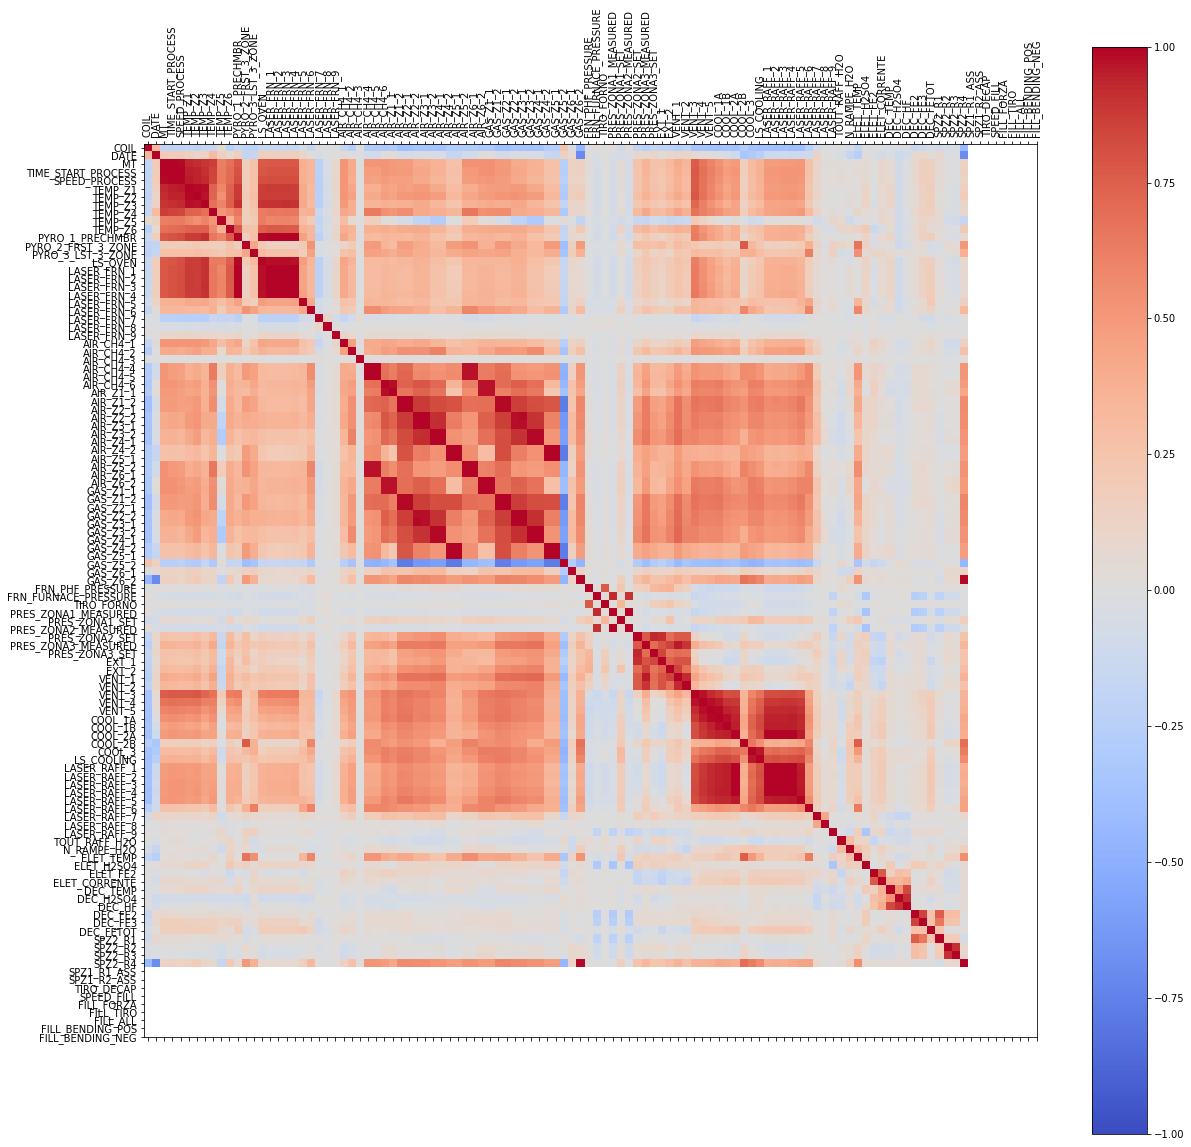

In [ ]:
corr = df0.corr()
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df0.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df0.columns)
ax.set_yticklabels(df0.columns)
plt.show()

In [ ]:
cor_matrix = df0.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
df1 = df0.drop(df0.columns[[to_drop]], axis=1)
df1.tail(100)    


In [ ]:
# This is required later for the data cleaning
'''
# to remove other special characters
df.columns=df.columns.str.replace('[#,@,&]','')
'''
cols = df.columns
for col in cols:
    df[col] = df[col].str().lstrip('"').rstrip('"'))

In [ ]:
df.tail(100)

,COIL,DATE,MT,TIME_START_PROCESS,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,TEMP_Z6,PYRO_1_PRECHMBR,PYRO_2_FRST_3_ZONE,PYRO_3_LST_3_ZONE,LS_OVEN,LASER_FRN_1,LASER_FRN_2,LASER_FRN_3,LASER_FRN_4,LASER_FRN_5,LASER_FRN_6,LASER_FRN_7,LASER_FRN_8,LASER_FRN_9,AIR_CH4_1,AIR_CH4_2,AIR_CH4_3,AIR_CH4_4,AIR_CH4_5,AIR_CH4_6,AIR_Z1_1,AIR_Z1_2,AIR_Z2_1,AIR_Z2_2,AIR_Z3_1,AIR_Z3_2,AIR_Z4_1,AIR_Z4_2,AIR_Z5_1,AIR_Z5_2,...,COOL_1A,COOL_1B,COOL_2A,COOL_2B,COOL_3,LS_COOLING,LASER_RAFF_1,LASER_RAFF_2,LASER_RAFF_3,LASER_RAFF_4,LASER_RAFF_5,LASER_RAFF_6,LASER_RAFF_7,LASER_RAFF_8,LASER_RAFF_9,TOUT_RAFF_H2O,N_RAMPE_H2O,ELET_TEMP,ELET_H2SO4,ELET_FE2,ELET_CORRENTE,DEC_TEMP,DEC_H2SO4,DEC_HF,DEC_FE2,DEC_FE3,DEC_FETOT,SPZ2_R1,SPZ2_R2,SPZ2_R3,SPZ2_R4,SPZ1_R1_ASS,SPZ1_R2_ASS,TIRO_DECAP,SPEED_FILL,FILL_FORZA,FILL_TIRO,FILL_ALL,FILL_BENDING_POS,FILL_BENDING_NEG
299284,6838679,2019-04-19,182.0,09:29:17.920,7.830089999999999,1041.337125,1054.396125,1045.387125,1045.1295,1066.244625,1046.320875,664.876125,1072.86075,859.712625,1070.60625,695.536875,1061.09325,1065.974625,1070.742375,1074.274875,1073.458125,1068.582375,1061.317125,740.100375,1.066,1.117293,-4.587682,1.171418,0.147545,1.7123959999999998,764.719875,787.878,271.59525,453.202875,41.608463,103.559288,436.8465,442.93275,-3.3172870000000003,8.61012,...,487.08225,245.928375,117.358875,52.5249,31.1391,37.39545,23.097037,23.133038,23.106037,37.891463,37.070213,37.224788000000004,36.92025,36.734288,22.856962,46.163363000000004,12.49875,56.301638,107.1,0.0,2705.990625,69.290719,112.1625,40.95,22.95,48.9375,71.8875,561.9380629999999,530.0595,530.426812,530.138813,16.875,16.875,3309.013125,10.817831,195.969375,1414.395000,0.048715,0.258912,0.134985
299285,6838679,2019-04-19,189.0,09:30:17.920,7.815521,1044.462375,1056.938625,1047.078,1047.794625,1069.120125,1050.1875,658.28925,1074.218625,874.540125,1090.2465,700.711875,1081.07775,1086.049125,1090.79775,1093.557375,1092.749625,1088.082,1079.66475,746.330625,1.083445,1.1060219999999998,-4.606897,1.1672209999999998,0.149585,2.884331,777.8025,805.015125,295.381125,463.57425,42.000413,104.9706,430.43175,438.291,-3.513578,8.845459,...,487.6785,246.25125,117.313875,52.818975,30.796313,37.673212,22.996463000000002,23.090963000000002,23.009963,38.186213,37.29825,37.535287,37.085963,36.7875,22.845038,46.165836999999996,12.49875,56.423306000000004,107.1,0.0,2714.13,69.30635600000001,112.1625,40.95,22.95,48.9375,71.8875,561.7963129999999,530.116875,530.508938,530.181,16.875,16.875,3309.4575,10.198541,199.990125,1408.567500,0.050818,0.258896,0.134991
299286,6838679,2019-04-19,196.0,09:31:17.920,7.865539,1046.287125,1059.651,1048.523625,1052.89425,1069.45425,1053.25875,658.24875,1076.070375,879.350625,1096.71975,701.922375,1086.21225,1091.446875,1096.803,1100.539125,1099.674,1095.1335,1086.645375,748.783125,1.075401,1.1260350000000001,-4.638319,1.225868,0.142368,2.084164,802.029375,826.416,315.8775,472.9455,41.42655,103.710938,344.07,363.547125,-3.5643599999999998,8.635511,...,488.264625,246.58875,117.579375,52.551562,30.97485,38.107013,23.04225,23.074537,23.05125,38.646788,37.695712,37.978537,37.542713,36.997538,22.779,46.164825,12.49875,56.581031,107.1,0.0,2717.42625,69.348431,112.1625,40.95,22.95,48.9375,71.8875,561.93075,530.11125,531.268875,530.046,16.878769000000002,16.875,3309.024375,9.774540,180.093375,1408.747500,0.054173,0.258912,0.135020
299287,6838679,2019-04-19,203.0,09:32:17.920,7.817659,1049.898375,1063.29375,1050.444,1053.241875,1071.424125,1056.270375,657.275625,1076.9805,883.1475,1101.51,702.657,1091.53125,1096.5195,1101.198375,1104.976125,1104.584625,1100.269125,1091.719125,751.4145,1.094537,1.122774,-4.589111,1.16649,0.165926,1.923502,827.589375,854.706375,306.60975,472.597875,44.006625,106.43793799999999,414.46125,424.7415,-3.079991,8.989009,...,488.6415,246.609,117.709875,52.915725,30.71115,37.863225,23.1435,23.155537,23.072288,38.361712,37.634963,37.593,37.382963000000004,36.89325,22.823211999999998,46.165725,12.49875,56.649713,107.1,0.0,2718